In [57]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import zuko
import torch

from helpers.distributions import *
from helpers.flow import *

from rikabplotlib.plot_utils import newplot, stamp 

In [58]:
E0 = 500

beta = 1
R = 0.5

def alpha_s(scale):
    lambda_qcd = 0.2
    beta_0 = 11 - 2/3 * 3
    return 4 * np.pi / (beta_0 * np.log(scale**2 / lambda_qcd**2))

def LO_angularity(lambda_, E0 = 500, R = 0.4,  beta = 1):

    scale = E0 * np.power(lambda_, 1 / (beta))

    alpha_s_scale = alpha_s(scale)
    C_F = 4/3
    C_A = 3

    return -(2 * alpha_s_scale * C_F / (1 * np.pi * beta * R)) * np.log(lambda_ ) / lambda_ 


def dalpha_dscale(scale):
    lambda_qcd = 0.2
    beta_0 = 11 - 2/3 * 3
    return -4 * np.pi / beta_0  / (np.log(scale**2 / lambda_qcd**2) ** 2) * 2 / scale




def df_dx(lambda_, beta = 1):

    lambda_qcd = 0.2
    beta_0 = 11 - 2/3 * 3

    scale = E0 * np.power(lambda_, 1 / (beta))
    alpha_s_scale = alpha_s(scale)

    C_F = 4/3


    dLO_dalpha =  -C_F / (beta * R *  np.pi) * np.power(np.log(lambda_), 2)
    dalpha_dscale = -4 * np.pi / beta_0  / (np.log(scale**2 / lambda_qcd**2) ** 2) * 2 / scale
    dscale_dlambda = E0

    return dLO_dalpha * dalpha_dscale * dscale_dlambda


def Theta(x):
    return 0.5 * (np.sign(x) + 1)
   

def LL_angularity(lambda_, E0 = 500, R = 0.4,  beta = 1):

    scale = E0 * np.power(lambda_, 1 / (beta))
    print(scale)

    alpha_s_scale = alpha_s(scale)
    print(alpha_s_scale)
    C_F = 4/3
    C_A = 3

    p = np.nan_to_num(LO_angularity(lambda_, E0, R,  beta) * np.exp(-1 * alpha_s_scale * C_F / (beta * R *  np.pi) * np.power(np.log(lambda_), 2)) )

    return (p * Theta(lambda_) * Theta(1 - lambda_))



def LL_exact_angularity(lambda_, E0 = 500, R = 0.4,  beta = 1):

    scale = E0 * np.power(lambda_, 1 / (beta))
    

    alpha_s_scale = alpha_s(scale)
    C_F = 4/3
    C_A = 3

    p = np.nan_to_num((LO_angularity(lambda_, beta) + df_dx(lambda_, beta)) * np.exp(-1 * alpha_s_scale * C_F / (beta * R *  np.pi) * np.power(np.log(lambda_), 2)) )

    return  (p * Theta(lambda_) * Theta(1 - lambda_)) * 1


def NLO_angularity(lambda_, Q, mu):

    x = lambda_ * 2 / 3


    C_F = 4/3
    L = np.log(mu**2 / Q**2)

    scale = E0 * np.power(x, 1 / (1))
    alpha = alpha_s(scale)
    
    c1 = (alpha * C_F) / np.pi
    p1 = -3/4 - np.log(mu**2 / Q**2 / x) / x + 2 * np.log(mu**2 / Q**2 / x**2) / x

    c2 = c1
    p2 = 2 * np.log(mu**2 / Q**2 / x **2 ) / x * (0.5 * L**2 + 0.75 * L ) + (0.75  + np.log(mu**2 / Q**2 / x) / x)*(0.5 * L**2 - np.pi**2/12)

    h = 1 - c1/2 * (8 - 7 * np.pi**2 / 7 * L**2 + 3 * L) 

    return h * (c1 * p1 + c2 * p2) * 3 / 2


500
[  0.           0.5005005    1.001001     1.5015015    2.002002
   2.5025025    3.003003     3.5035035    4.004004     4.5045045
   5.00500501   5.50550551   6.00600601   6.50650651   7.00700701
   7.50750751   8.00800801   8.50850851   9.00900901   9.50950951
  10.01001001  10.51051051  11.01101101  11.51151151  12.01201201
  12.51251251  13.01301301  13.51351351  14.01401401  14.51451451
  15.01501502  15.51551552  16.01601602  16.51651652  17.01701702
  17.51751752  18.01801802  18.51851852  19.01901902  19.51951952
  20.02002002  20.52052052  21.02102102  21.52152152  22.02202202
  22.52252252  23.02302302  23.52352352  24.02402402  24.52452452
  25.02502503  25.52552553  26.02602603  26.52652653  27.02702703
  27.52752753  28.02802803  28.52852853  29.02902903  29.52952953
  30.03003003  30.53053053  31.03103103  31.53153153  32.03203203
  32.53253253  33.03303303  33.53353353  34.03403403  34.53453453
  35.03503504  35.53553554  36.03603604  36.53653654  37.03703704
  37.5375

/tmp/ipykernel_108817/2536175290.py:9: RuntimeWarning: divide by zero encountered in log
  return 4 * np.pi / (beta_0 * np.log(scale**2 / lambda_qcd**2))
/tmp/ipykernel_108817/2536175290.py:19: RuntimeWarning: divide by zero encountered in log
  return -(2 * alpha_s_scale * C_F / (1 * np.pi * beta * R)) * np.log(lambda_ ) / lambda_
/tmp/ipykernel_108817/2536175290.py:19: RuntimeWarning: invalid value encountered in multiply
  return -(2 * alpha_s_scale * C_F / (1 * np.pi * beta * R)) * np.log(lambda_ ) / lambda_
/tmp/ipykernel_108817/2536175290.py:62: RuntimeWarning: divide by zero encountered in log
  p = np.nan_to_num(LO_angularity(lambda_, E0, R,  beta) * np.exp(-1 * alpha_s_scale * C_F / (beta * R *  np.pi) * np.power(np.log(lambda_), 2)) )
/tmp/ipykernel_108817/2536175290.py:62: RuntimeWarning: invalid value encountered in multiply
  p = np.nan_to_num(LO_angularity(lambda_, E0, R,  beta) * np.exp(-1 * alpha_s_scale * C_F / (beta * R *  np.pi) * np.power(np.log(lambda_), 2)) )


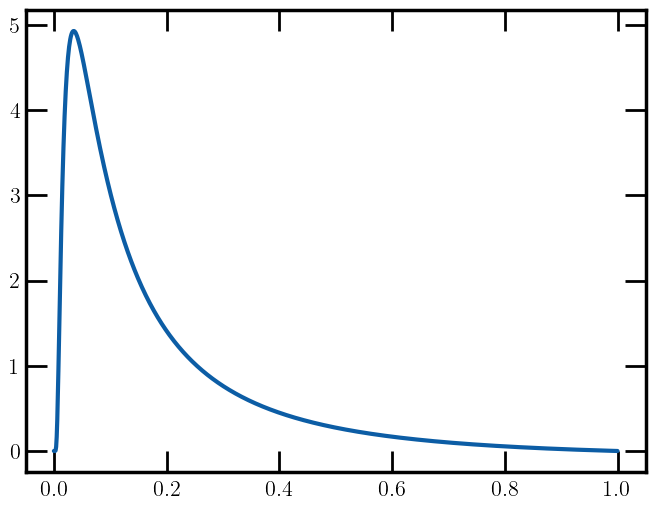

In [59]:
print(E0)

# plot the LL
plt.figure(figsize=(8, 6))
lambdas = np.linspace(0, 1, 1000)
plt.plot(lambdas, LL_angularity(lambdas), label = "LL")

In [60]:
import yaml

flow_id = "Ctheory_log_bpf"

with open(f"test/{flow_id}.yml") as stream:
    run_params = yaml.safe_load(stream)
print(run_params)

target_p = LO_angularity
x_range = (0, 1)

E0 = run_params["physics"]["E0"]
R = run_params["physics"]["R"]




{'C': 'C_theory', 'LOSS': 'logMSE', 'MODE': 'UNIFORM_SAMPLES', 'TYPE': 'bpf', 'architecture': {'hidden_features': [32, 32], 'num_aux': 0, 'num_trainable_params': 8405, 'num_transforms': 5}, 'hyperparams': {'batch_num_c': 32, 'batch_num_x': 512, 'epochs': 2000, 'lr': 0.001, 'seed': 1}, 'physics': {'E0': 500, 'R': 0.4, 'target_p': '<function LO_angularity at 0x7f93f4a025e0>'}}


In [61]:
auxiliary_params = run_params["architecture"]["num_aux"]

flow = zuko.flows.BPF(features = auxiliary_params + 1, context=1, transforms= run_params["architecture"]["num_transforms"], hidden_features=run_params["architecture"]["hidden_features"])
flow.load_state_dict(torch.load(f"test/{flow_id}_model", weights_only=True))
flow.eval()

BPF(
  (transform): LazyComposedTransform(
    (0-4): 5 x ElementWiseTransform(
      (base): BoundedBernsteinTransform()
      (hyper): MLP(
        (0): Linear(in_features=1, out_features=32, bias=True)
        (1): ReLU()
        (2): Linear(in_features=32, out_features=32, bias=True)
        (3): ReLU()
        (4): Linear(in_features=32, out_features=17, bias=True)
      )
    )
  )
  (base): UnconditionalDistribution(DiagNormal(loc: tensor([0.]), scale: tensor([1.])))
)

/tmp/ipykernel_108817/2536175290.py:9: RuntimeWarning: divide by zero encountered in log
  return 4 * np.pi / (beta_0 * np.log(scale**2 / lambda_qcd**2))
/tmp/ipykernel_108817/2536175290.py:19: RuntimeWarning: divide by zero encountered in log
  return -(2 * alpha_s_scale * C_F / (1 * np.pi * beta * R)) * np.log(lambda_ ) / lambda_
/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_108817/2527982641.py:63: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Cutoff")
/tmp/ipykernel_108817/2536175290.py:62: RuntimeWarning: overflow encountered in multiply
  p = np.nan_to_num(LO_angularity(lambda_, E0, R

[3.5762787e-04 1.7821789e-02 8.0049038e-02 ... 4.9994409e+02 4.9995126e+02
 4.9998022e+02]
[-0.110349   -0.28873527 -0.7624206  ...  0.08923027  0.08923011
  0.08922943]


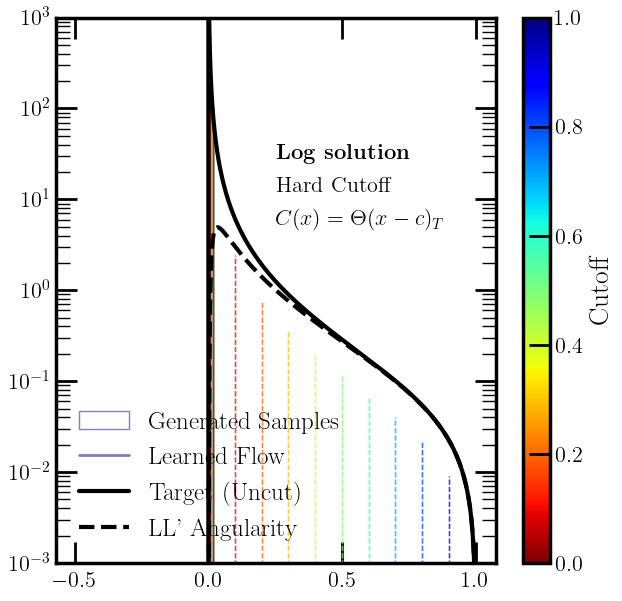

In [63]:
# Plot distribution of xs



fig, ax = newplot("full")
cs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999][::-1]
# cs = [0.5]

DRAW_NF_HIST = True
DRAW_NF_LINES = True
aux_draws = 5


for i in range(len(cs)):


    # Draw hist
    c = torch.tensor((cs[i],))

    if DRAW_NF_HIST:
        samples = sigmoid(flow(c).sample((100000,)))
        x_samples = samples[:,0].detach().numpy()
        aux_samples = samples[:,1:].detach().numpy()

        jet_color = plt.get_cmap("jet")(  i / 10)
        if i == 0:
            label = "Generated Samples"
        else:
            label = None
        ax.hist(x_samples, bins=100, density=True, color = jet_color, alpha = 0.5, label = label, histtype="step")

    if DRAW_NF_LINES:

        for aux_draw in range(aux_draws):
            xs = torch.rand(10000, auxiliary_params + 1) * (x_range[1] - x_range[0]) + x_range[0]
            
            # Sort the first column
            xs = xs[torch.argsort(xs[:,0])]
            xs[:,1:] = torch.rand(1) * torch.ones((10000, auxiliary_params))
            

            logJ = torch.sum(log_abs_det_jacobian_sigmoid(inverse_sigmoid(xs)), axis = 1)
            ys = (flow(c).log_prob(inverse_sigmoid(xs)) + logJ).exp()

            xs = xs[:,0].detach().numpy().flatten()
            ys = np.nan_to_num(ys.detach().numpy().flatten())

            jet_color = plt.get_cmap("jet")( i / 10)
            if i == 0 and aux_draw == 0:
                label = "Learned Flow"
            else:
                label = None

            ax.plot(xs, ys, color = jet_color, lw = 2, alpha = 0.5, label = label)

            ax.vlines(cs[i], 0, target_p(c, E0, R = 1), color = jet_color, linestyle = "--", alpha = 0.25, lw = 1)



# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("jet_r"), norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
plt.colorbar(sm, label="Cutoff")




# c = torch.tensor((0.5,))
# xs = torch.zeros((10000, auxiliary_params + 1)) + 0.5
# xs[:,0] = torch.linspace(0.001, 0.999, 10000)
# logJ = torch.sum(log_abs_det_jacobian_sigmoid(inverse_sigmoid(xs)), axis = 1)
# ys = (flow(c).log_prob(inverse_sigmoid(xs)) + logJ).exp()

# print(flow(c).log_prob(inverse_sigmoid(xs)))
# print(ys)

# xs = xs[:,0].detach().numpy().flatten()
# ys = np.nan_to_num(ys.detach().numpy().flatten())
# ps = target_p(torch.tensor(xs)).detach().numpy().flatten()
# plt.plot(xs, ys, color = "red", label = "Learned Flow")
# print(ys.mean())

# c = c.detach().numpy()

cutoff = xs > 0.5

plt.plot(xs, target_p(xs,  E0, R = 0.4), color = "Black", label = "Target (Uncut)", lw = 3)
plt.plot(xs, LL_angularity(xs, E0, R = 0.4), color = "black", linestyle = "--", label = "LL' Angularity", lw = 3)
# plt.plot(xs, LL_angularity(torch.tensor(xs), 0.118, E0, R), color = "black", linestyle = "--", label = "LL-exact Angularity")



line_0 = f"Log solution"
line_1 = f"Hard Cutoff"
line_2 = f"$C(x) = \Theta(x - c)_T $ "
stamp(0.5, 0.75, ax, line_0 = line_0, line_1 = line_1, line_2 = line_2)

# cutoff_norm = np.trapz(ps * cutoff, xs)
# plt.plot(xs, cutoff * ps , color = "grey", label = rf"Target (Cut at $c$ = {cs[0]})")

plt.legend()

plt.yscale("log")

plt.ylim(1e-3, 1e3)

c = torch.tensor((0.5,))
samples = sigmoid(flow(c).sample((100000,)))
x_samples = samples[:,0].detach().numpy()
aux_samples = samples[:,1:].detach().numpy()


# plot the auxiliary variables
if auxiliary_params > 0:
    fig, ax = plt.subplots(1,1)
    for i in range(auxiliary_params):
        plt.hist(aux_samples[:,i], bins=100, density=True, alpha = 0.5, label=f"Aux {i}")
        prob = flow(c).log_prob(samples).exp()
        # plt.scatter(aux_samples[:,i], prob.detach().numpy(), color = "red")
    plt.legend()

# # correlation between auxiliary variable 1 and x
# fig, ax = plt.subplots(1,1)
# bar = ax.hist2d(x_samples, aux_samples[:,0], bins=100, density=True, norm=mpl.colors.LogNorm(), cmap="Reds")
# plt.colorbar(bar[3])
# plt.xlabel("x")
# plt.ylabel("Aux 0")

